# Get stocks from Bovesp and do an analysis

Here in this notebook, we are getting data from Bovespa and the enterprise ultra and start using python to create charts and analyze how the stocks and marketing are performing from January 2022 until august 2022.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

Connecting with yahoo to get the data from Ibovespa and Ultrapar enterprise

In [43]:
cotacao_ibov = web.DataReader('^BVSP',data_source='yahoo',start='2022-01-01',end='2022-08-06')
cotacao_ultra = web.DataReader('UGPA3.SA',data_source='yahoo',start='2022-01-01',end='2022-08-06')

In [44]:
display(cotacao_ibov)
display(cotacao_ultra)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,106125,103413,104823,103922,11128500,103922
2022-01-04,104276,103096,103922,103514,11491600,103514
2022-01-05,103514,100850,103514,101006,0,101006
2022-01-06,102235,101000,101006,101561,11749200,101561
2022-01-07,102719,101104,101561,102719,11733200,102719
...,...,...,...,...,...,...
2022-08-01,103317,101764,103165,102225,11626700,102225
2022-08-02,103660,101694,102225,103362,10124500,103362
2022-08-03,103878,102822,103362,103775,12379600,103775


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,14.92,14.08,14.54,14.12,7856600.0,13.530124
2022-01-04,14.31,13.48,14.31,13.59,7254500.0,13.022265
2022-01-05,13.70,13.18,13.49,13.23,10312000.0,12.677303
2022-01-06,13.33,12.99,13.19,13.04,5933600.0,12.495242
2022-01-07,13.21,12.77,12.97,12.95,5583600.0,12.409001
...,...,...,...,...,...,...
2022-08-01,12.98,12.60,12.63,12.90,2710200.0,12.900000
2022-08-02,13.12,12.77,12.95,12.99,4962600.0,12.990000
2022-08-03,13.48,12.93,13.05,13.46,4569800.0,13.460000


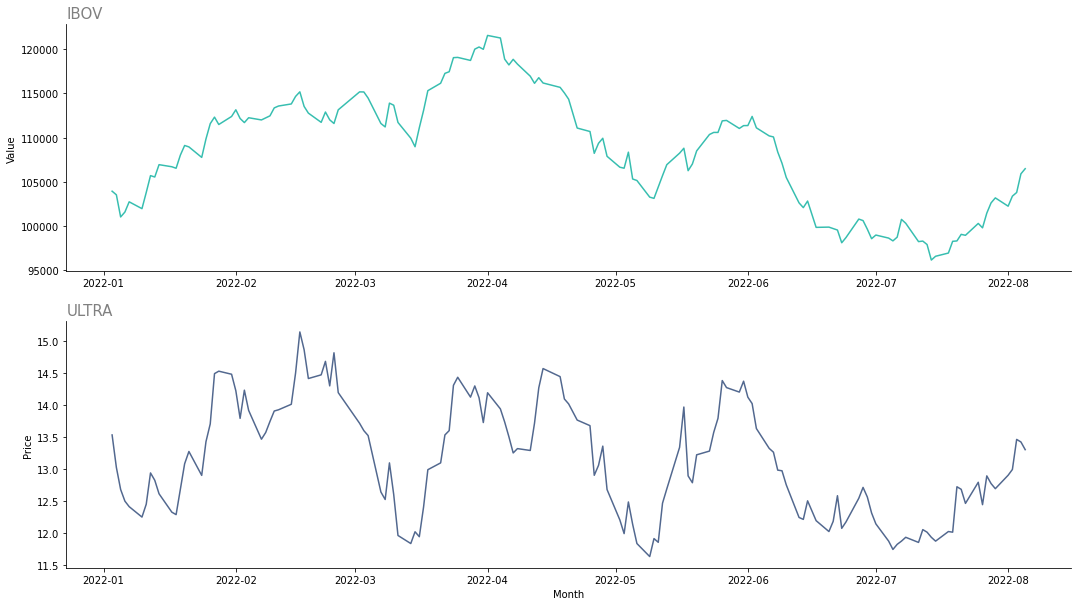

In [45]:
fig, ax = plt.subplots(nrows=2,figsize=(18,10))

x0 = cotacao_ibov.index
y0 = cotacao_ibov['Adj Close']

ax[0].plot(x0,y0,color = '#37BEB0')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].set_title('IBOV', color='Grey', size=15, loc='left')
ax[0].set_ylabel('Value')

x = cotacao_ultra.index
y = cotacao_ultra['Adj Close']

ax[1].plot(x,y,color = '#52688F')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].set_title('ULTRA', color='Grey', size=15, loc='left')

ax[1].set_xlabel('Month')
ax[1].set_ylabel('Price')

plt.show()

## Return
- Now, we are calculating the return since January

In [18]:
retorno_ultra = cotacao_ultra['Adj Close'][-1] / cotacao_ultra['Adj Close'][0] -1
retorno_ibov = cotacao_ibov['Adj Close'][-1] / cotacao_ibov['Adj Close'][0] -1

In [20]:
print('The return was: {:.2%} from Ultra'.format(retorno_ultra))
print('The return was: {:.2%} from IBOV'.format(retorno_ibov))

The return was: -1.70% from Ultra
The return was: 1.17% from IBOV


- And now, we are creating a chart to analyze the moving average from the ultra enterprise during 21 days.

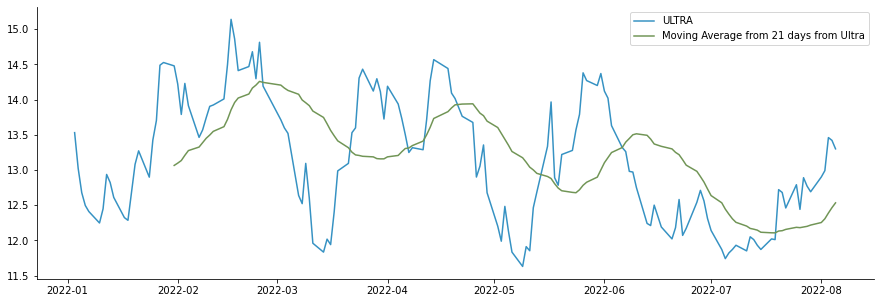

In [21]:
fig, ax = plt.subplots(figsize=(15,5))

x = cotacao_ultra.index
y = cotacao_ultra['Adj Close']
x1 = cotacao_ultra.index
y1 = cotacao_ultra['Adj Close'].rolling(21).mean()

ax.plot(x,y,color = '#3692c3',label = 'ULTRA')
ax.plot(x1,y1,color = '#719556',label = 'Moving Average from 21 days from Ultra')

ax.legend()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

## Analyzing a wallet perform

In [30]:
wallet = pd.DataFrame({'Property':['BOVA11','KNRI11','BBDC3'],
                         'Type':['ETF','FIIS','STOCKS'],
                        'Amount':[5,200,1200]})

In [31]:
wallet.head()

,Property,Type,Amount
0,BOVA11,ETF,5
1,KNRI11,FIIS,200
2,BBDC3,STOCKS,1200


In [32]:
stocks_wallet = pd.DataFrame()
for ativo in wallet['Property']:
    stocks_wallet[ativo] = web.DataReader('{}.SA'.format(ativo), data_source='yahoo', start='2022-01-01', end='2022-08-06')['Adj Close']
    
display(stocks_wallet)

,BOVA11,KNRI11,BBDC3
Date,,,
2022-01-03,99.930000,132.651627,14.732563
2022-01-04,99.570000,129.909470,14.801404
2022-01-05,97.099998,130.035416,14.703381
2022-01-06,97.849998,129.754425,14.863781
2022-01-07,98.699997,129.386215,14.926159
...,...,...,...
2022-08-01,98.559998,138.990005,14.422750
2022-08-02,99.529999,138.860001,14.640000
2022-08-03,100.199997,138.500000,14.820000


In [33]:
# Analyzing the data
stocks_wallet.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 150 entries, 2022-01-03 to 2022-08-05
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  150 non-null    float64
 1   KNRI11  150 non-null    float64
 2   BBDC3   150 non-null    float64
dtypes: float64(3)
memory usage: 4.7 KB


## Normalizing the stock's wallets to see them perform

In [34]:
wallet_norm = stocks_wallet/stocks_wallet.iloc[0]

In [35]:
wallet_norm.head(3)

,BOVA11,KNRI11,BBDC3
Date,,,
2022-01-03,1.000000,1.000000,1.000000
2022-01-04,0.996397,0.979328,1.004673
2022-01-05,0.971680,0.980278,0.998019


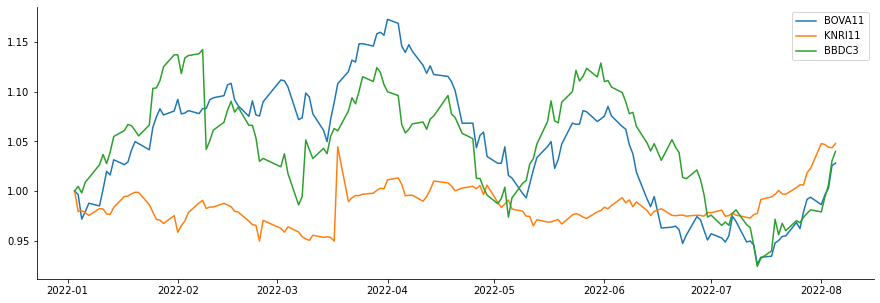

In [36]:
fig, ax = plt.subplots(figsize=(15,5))

x = wallet_norm.index
y = wallet_norm['BOVA11']
x1 = wallet_norm.index
y1 = wallet_norm['KNRI11']
x2 = wallet_norm.index
y2 = wallet_norm['BBDC3']

ax.plot(x,y,label = 'BOVA11')
ax.plot(x1,y1,label = 'KNRI11')
ax.plot(x2,y2,label = 'BBDC3')

ax.legend(bbox_to_anchor=(1, 1))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

## Comparing the wallet with the bovespa

In [39]:
invest = pd.DataFrame()
for ativo in wallet['Property']:
    invest[ativo] = stocks_wallet[ativo] * wallet.loc[wallet['Property']== ativo,'Amount'].values[0]
display(invest)

,BOVA11,KNRI11,BBDC3
Date,,,
2022-01-03,499.650002,26530.325317,17679.075623
2022-01-04,497.849998,25981.893921,17761.684799
2022-01-05,485.499992,26007.083130,17644.056702
2022-01-06,489.249992,25950.885010,17836.537170
2022-01-07,493.499985,25877.243042,17911.390686
...,...,...,...
2022-08-01,492.799988,27798.001099,17307.300568
2022-08-02,497.649994,27772.000122,17568.000412
2022-08-03,500.999985,27700.000000,17783.999634


In [40]:
invest['Total'] = invest.sum(axis=1)

In [47]:
invest_norm = invest/invest.iloc[0]
cotacao_ibov_norm = cotacao_ibov/cotacao_ibov.iloc[0]

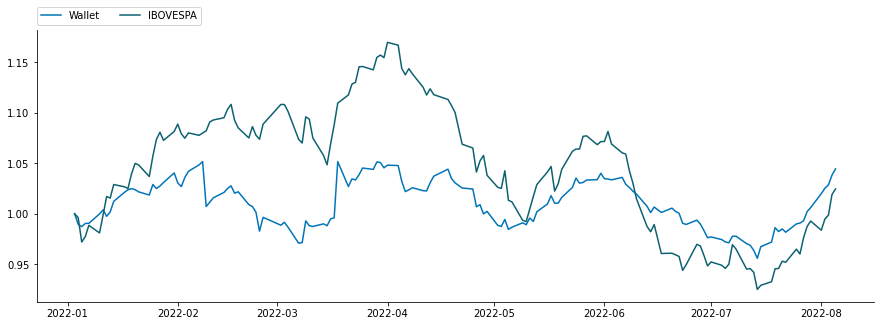

In [48]:
# Chart to compare

fig, ax = plt.subplots(figsize=(15,5))

x = invest_norm.index
y = invest_norm['Total'] 
x1 = cotacao_ibov_norm.index
y1 = cotacao_ibov_norm['Adj Close'] 

ax.plot(x,y,color = '#0074B7',label='Wallet')
ax.plot(x1,y1,color = '#0C6170',label= 'IBOVESPA')

ax.legend(bbox_to_anchor=(0., 1.02, 1., .102),loc='lower left', ncol=2, borderaxespad=0.)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

In [50]:
r_wallet = invest.Total[-1]/invest.Total[0] -1
r_ibov = cotacao_ibov['Adj Close'][-1]/cotacao_ibov['Adj Close'][0] -1
print('Return of the wallet was {:.2%} and the IBOV was {:.2%}'.format(r_wallet,r_ibov))

Return of the wallet was 4.45% and the IBOV was 2.45%


In [51]:
correlation = invest.Total.corr(cotacao_ibov['Adj Close'])
print(correlation)

0.7093785023495232
